In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Предобработка для бинарного классификатора

In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/gdrive/MyDrive/StudyData/Potato_binary'
blight_dir = '/content/gdrive/MyDrive/StudyData/Potato_binary/Potato___blight'
healthy_dir = '/content/gdrive/MyDrive/StudyData/Potato_binary/Potato___healthy'

print('blight photos:', len(os.listdir(blight_dir)))
print('healthy photos:', len(os.listdir(healthy_dir)))

img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # изменение режима классификации на binary
    subset='training',
    shuffle=True  # перемешивание данных
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # изменение режима классификации на binary
    subset='validation',
    shuffle=True  # перемешивание данных
)

blight photos: 2000
healthy photos: 152
Found 1722 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


Создание и обучение модели бинарного классификатора

Epoch 1/20
53/53 [==============================] - 20s 351ms/step - loss: 0.2402 - accuracy: 0.9290 - val_loss: 0.1975 - val_accuracy: 0.9303
Epoch 2/20
53/53 [==============================] - 20s 370ms/step - loss: 0.1843 - accuracy: 0.9296 - val_loss: 0.1593 - val_accuracy: 0.9351
Epoch 3/20
53/53 [==============================] - 20s 372ms/step - loss: 0.1557 - accuracy: 0.9361 - val_loss: 0.1367 - val_accuracy: 0.9375
Epoch 4/20
53/53 [==============================] - 20s 383ms/step - loss: 0.1321 - accuracy: 0.9462 - val_loss: 0.1348 - val_accuracy: 0.9591
Epoch 5/20
53/53 [==============================] - 18s 341ms/step - loss: 0.1228 - accuracy: 0.9580 - val_loss: 0.1168 - val_accuracy: 0.9471
Epoch 6/20
53/53 [==============================] - 20s 372ms/step - loss: 0.1160 - accuracy: 0.9627 - val_loss: 0.1120 - val_accuracy: 0.9639
Epoch 7/20
53/53 [==============================] - 20s 373ms/step - loss: 0.1054 - accuracy: 0.9623 - val_loss: 0.1073 - val_accuracy: 0.9639

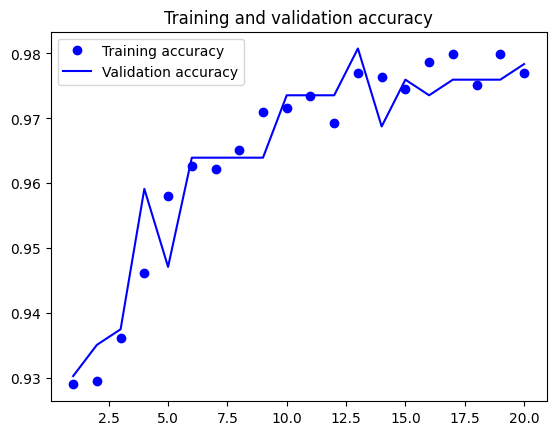

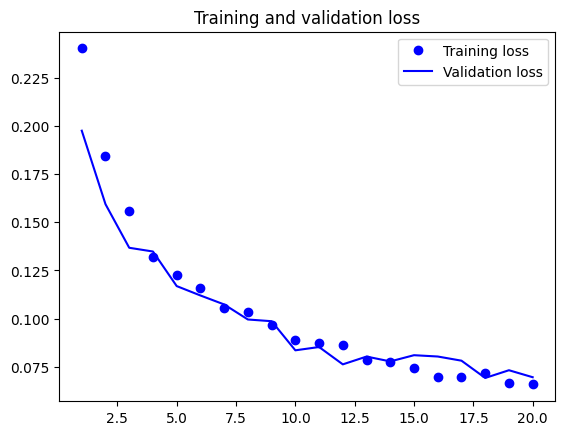

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

# Создание модели бинарного классификатора с использованием VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Используем sigmoid для бинарной классификации

conv_base.trainable = False  # Замораживаем предварительно обученные веса

# Компиляция и обучение модели
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Код для построения графиков изменения функции потерь и точности во время обучения

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Сохранение модели
model.save('/content/gdrive/My Drive/StudyData/Models/binary_classifier_model.h5')

Предобработка для многоклассового классификатора

In [18]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class_names = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]
data_dir = '/content/gdrive/MyDrive/StudyData/Potato_multy'
erly_blight_dir = '/content/gdrive/MyDrive/StudyData/Potato_multy/Potato___Early_blight'
late_blight_dir = '/content/gdrive/MyDrive/StudyData/Potato_multy/Potato___Late_blight'
healthy_dir = '/content/gdrive/MyDrive/StudyData/Potato_multy/Potato___healthy'

print('erly blight photos:', len(os.listdir(erly_blight_dir)))
print('late blight photos:', len(os.listdir(late_blight_dir)))
print('healthy photos:', len(os.listdir(healthy_dir)))

img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

erly blight photos: 1000
late blight photos: 1000
healthy photos: 152
Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


Создание и обучение модели мноклассового классификатора

Epoch 1/20
53/53 [==============================] - 423s 8s/step - loss: 0.7636 - accuracy: 0.6757 - val_loss: 0.6329 - val_accuracy: 0.7933
Epoch 2/20
53/53 [==============================] - 19s 351ms/step - loss: 0.5587 - accuracy: 0.8112 - val_loss: 0.4833 - val_accuracy: 0.8245
Epoch 3/20
53/53 [==============================] - 19s 364ms/step - loss: 0.4500 - accuracy: 0.8485 - val_loss: 0.4150 - val_accuracy: 0.8630
Epoch 4/20
53/53 [==============================] - 20s 374ms/step - loss: 0.3895 - accuracy: 0.8746 - val_loss: 0.3833 - val_accuracy: 0.8462
Epoch 5/20
53/53 [==============================] - 20s 379ms/step - loss: 0.3409 - accuracy: 0.8888 - val_loss: 0.3268 - val_accuracy: 0.9159
Epoch 6/20
53/53 [==============================] - 20s 373ms/step - loss: 0.3025 - accuracy: 0.9077 - val_loss: 0.2975 - val_accuracy: 0.8870
Epoch 7/20
53/53 [==============================] - 20s 377ms/step - loss: 0.2871 - accuracy: 0.9107 - val_loss: 0.2796 - val_accuracy: 0.9014
E

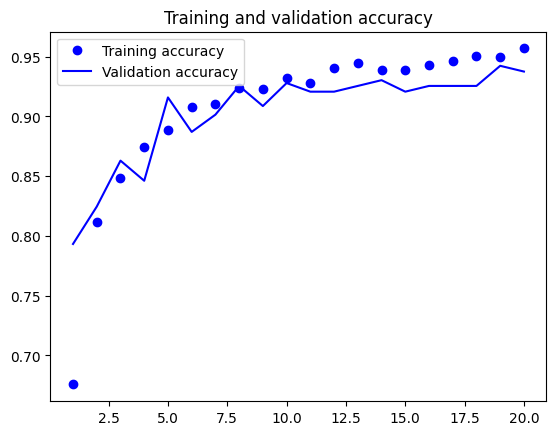

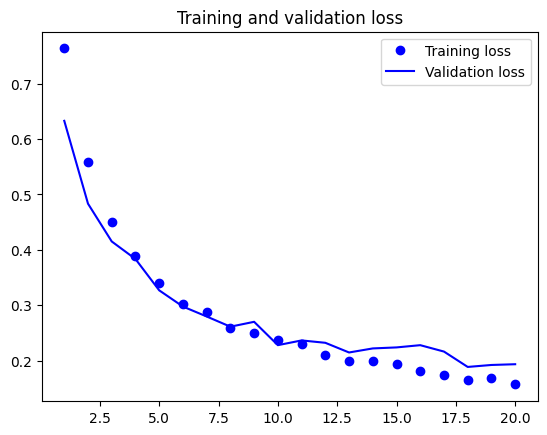

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

# Создание модели бинарного классификатора с использованием VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))  # Используем softmax для многоклассовой классификации

conv_base.trainable = False  # Замораживаем предварительно обученные веса

# Компиляция и обучение модели
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Код для построения графиков изменения функции потерь и точности во время обучения
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Сохранение модели
model.save('/content/gdrive/My Drive/StudyData/Models/multi_class_classifier_model.h5')
